## Import the data into a pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats


#read csv and create data frame

swift_dash = "multiTimeline1.csv"
swift_dash_df  = pd.read_csv("multiTimeline1.csv")
swift_dash_df .head()

,Week,Taylor Swift: (United States),Kim Kardashian: (United States)
0,2020-12-06,46,15
1,2020-12-13,44,14
2,2020-12-20,26,14
3,2020-12-27,23,13
4,2021-01-03,18,74



b. Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset
c. Run either an ARMA, ARIMA, or SARIMA on it
d. Explain the results
e. Discuss your findings with your group and explain what trend someone else
chose and why they chose the model they did
2. What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code)
and explain the key elements.

In [2]:
swift_dash_df.columns

Index(['Week', 'Taylor Swift: (United States)',
       'Kim Kardashian: (United States)'],
      dtype='object')

## b. Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset

In [42]:
import statsmodels.tsa.stattools as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

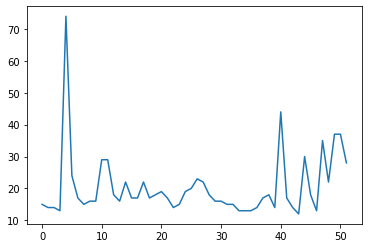

t-statistic            -6.374545e+00
p-value                 2.300998e-08
lags-used               0.000000e+00
no-of-observations      5.100000e+01
Critical Value (1%)    -3.565624e+00
Critical Value (5%)    -2.920142e+00
Critical Value (10%)   -2.598015e+00
dtype: float64


In [51]:
#plotting the data 
plt.plot (swift_dash_df['Kim Kardashian: (United States)'])
plt.show()

#checking for stationarity
#If Test statistic < Critical Value and p-value < 0.05 it is trend stationary?
nonst_test = sm.adfuller(swift_dash_df['Kim Kardashian: (United States)'])
kpss = pd.Series(nonst_test[0:4], index=['t-statistic','p-value','lags-used','no-of-observations'])
for key,value in nonst_test[4].items():
    kpss['Critical Value (%s)'%key] = value
print(kpss)

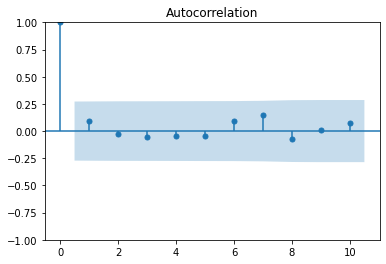

In [90]:
plot_acf(swift_dash_df[['Kim Kardashian: (United States)']], lags = 10, missing='drop', alpha=0.05)
plt.show()

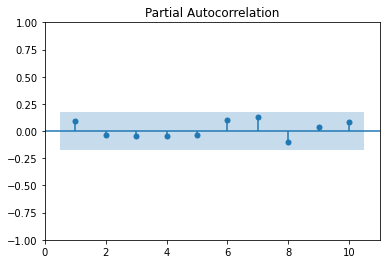

In [92]:
plot_pacf(swift_dash_df[['Kim Kardashian: (United States)']],method='ywm', zero = False, lags = 10, alpha=0.20) 
plt.show()
#tested changing alpha between 95-80% to see if any data falls outside the confidence level
#no points outside the CI

In [39]:
#Another way of verifying if the data is stationary / if diferrencing is needed ...ARIMA
import pmdarima as pm
test = pm.arima.PPTest(alpha=0.05) 
#test.is_stationary(swift_dash_df['Kim Kardashian: (United States)']) deprecated
test.should_diff(swift_dash_df['Kim Kardashian: (United States)'])
#no differencing needed data is stationary and ARMA is best

(0.01, False)

## c. Run either an ARMA, ARIMA, or SARIMA on it

In [78]:
model = ARIMA(swift_dash_df['Kim Kardashian: (United States)'],order=(1,0,1)) #ARMA

In [79]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     Kim Kardashian: (United States)   No. Observations:                   52
Model:                              ARIMA(0, 0, 1)   Log Likelihood                -194.608
Date:                             Fri, 03 Dec 2021   AIC                            395.215
Time:                                     22:25:46   BIC                            401.069
Sample:                                          0   HQIC                           397.460
                                              - 52                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4051      2.882      7.080      0.000      14.756      26.054
ma.L1          0.0938      0.269      0.349      0.727      -0.433       0.621
sigma2       104.2568     15.253      6.835      0.000      74.361     134.153
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               478.62
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             3.30
Prob(H) (two-sided):                  0.20   Kurtosis:                        16.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
model2 = ARIMA(swift_dash_df['Kim Kardashian: (United States)'],order=(1,1,2))
results2 = model2.fit()
results2.summary()

C:\Users\chdar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\chdar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     Kim Kardashian: (United States)   No. Observations:                   52
Model:                              ARIMA(1, 1, 2)   Log Likelihood                -193.240
Date:                             Fri, 03 Dec 2021   AIC                            394.481
Time:                                     23:42:58   BIC                            402.208
Sample:                                          0   HQIC                           397.433
                                              - 52                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0060      1.818      0.003      0.997      -3.557       3.569
ma.L1         -0.8939      5.974     -0.150      0.881     -12.602      10.814
ma.L2         -0.1053      1.809     -0.058      0.954      -3.651       3.440
sigma2       106.4042    583.823      0.182      0.855   -1037.868    1250.677
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               432.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             3.24
Prob(H) (two-sided):                  0.22   Kurtosis:                        15.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## d. Explain the results

Utilized the kim column. I chose ARMA for this dataset as the data is not seasonal, no differencing is needed and it is already stationary. There is 1 lag outside the confidence level of my acf (AR) and none on the pacf. I varied the alpha and still found no lags on the pacf (MA) outside the confidence level but the graph shows a negative correlation. 

## e. Discuss your findings with your group and explain what trend someone else chose and why they chose the model they did

Clarine also chose the Kim K and Taylor Swift trend data. We both explored Kim K trends, but she chose the ARIMA model after running the AFD test. As the data changed towards the end of the model she found it to be a better fit as the data changed towards the end of the year.  

## 2. What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code) and explain the key elements.

Fourier transform converts x axis of a signal for time intervals into frequency.  

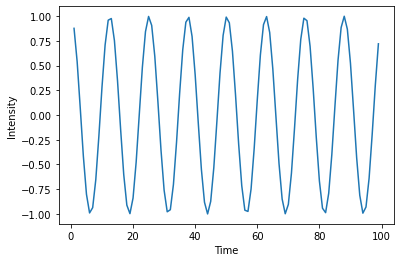

In [147]:
from scipy import signal

x = np.arange(1,100,1)
y = np.cos(x/2)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()